<a href="https://www.kaggle.com/code/niramay/attrition-prediction?scriptVersionId=107258903" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [2]:
all_data = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
all_data.shape

(1470, 35)

target variable - Attrition


categoricals - BusinessTravel, Department, Education, EducationField, EmployeeSatisfaction, Gender, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, Over18, OverTime, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, WorkLifeBalance.

In [3]:
# Checking for missing values

all_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


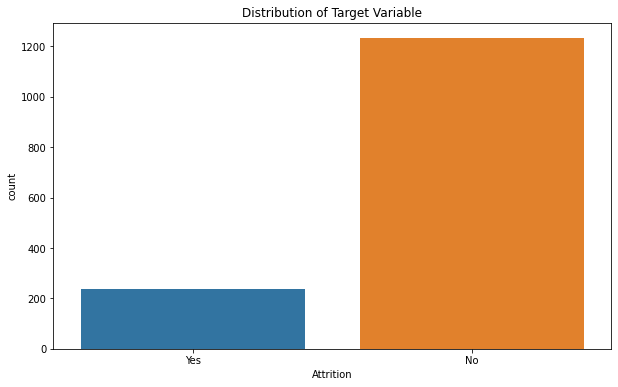

In [4]:
# Checking the target variable distribution

plt.figure(figsize = (10,6))
sns.countplot('Attrition',data=all_data).set_title('Distribution of Target Variable')
plt.show()

In [5]:
# checking the values of all the features using value counts

categoricals = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

for feature in categoricals:
    print(f"Values Counts for [{feature}]")
    print(all_data[feature].value_counts())
    print("\n\n")


Values Counts for [BusinessTravel]
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64



Values Counts for [Department]
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64



Values Counts for [Education]
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64



Values Counts for [EducationField]
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64



Values Counts for [EnvironmentSatisfaction]
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64



Values Counts for [Gender]
Male      882
Female    588
Name: Gender, dtype: int64



Values Counts for [JobInvolvement]
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64



Values Counts for [JobLevel]
1    543
2    534
3

Categorical variables that are Binary- Gender, Over18, OverTime, PerformanceRating.

Performance Rating has only two values- 3 & 4. We can modify the values such that 0 replaces 3 and 1 replaces 4.

The number of data points are 1470 and the Over18 column has all values as Y. So we can drop that column

In [6]:
all_data['OverTime'] = all_data['OverTime'].map({'Yes': 1, 'No': 0})
all_data['OverTime'].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [7]:
all_data['Gender'] = all_data['Gender'].map({'Male': 1, 'Female': 0})
all_data['Gender'].value_counts()

1    882
0    588
Name: Gender, dtype: int64

In [8]:
all_data['PerformanceRating'] = all_data['PerformanceRating'].map({3: 0, 4: 1})
all_data['PerformanceRating'].value_counts()

0    1244
1     226
Name: PerformanceRating, dtype: int64

In [9]:
all_data = all_data.drop(['Over18'],axis=1)